In [133]:
import random
import numpy as np
import pandas as pd
import sys
import time
from random import randrange
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

In [134]:
m = (randrange(10,20))
n = random.sample(range(10,2000),10)
n = np.array(n)
n.sort()

In [135]:
n_test = 8
p_test = [None, 1, 3, 4, 5, 7, 9, 10, 11]

In [136]:

def rod_cut_recursive(p,n):
    r = [0 for _ in range(n + 1)]
    s = [0 for _ in range(n + 1)]
    
    for i in range(0,n+1):
        r[i] = -1   
        s[i] = -1
        memo_topdown(p,n,r,s) 
    return r, s


def memo_topdown(p,n,r,s):
    if r[n] >= 0:
        return r[n]
    
    if n == 0:
        return 0

    q = -1
    for i in range(1,n+1):
        temp =  p[i] + memo_topdown(p, n - i, r, s)
        if q < temp:
            q = temp
            s[n] = i
               
    r[n] = q
    return q


In [137]:
def rod_cut_iterative(p,n):
    r = [0 for _ in range(n + 1)]   
    s = [0 for _ in range(n + 1)]
    for j in range(1, n+1):
        q = -1
        for i in range(1, j+1):
            if q < p[i] + r[j-i]:
                q = p[i] + r[j-i]
                s[j] = i          
        r[j] = q                 
        
    return r,s

In [138]:
def print_cut_rod_solution_recursive(p,n):
    r,s = rod_cut_recursive(p, n)
    print("The ammount of" ,r[(n)], "is the maximum price")
    print("Length of each piece wich rod divided is:", end=" ")
    while n > 0:
        print(s[n], end=" ")
        n = n - s[n]

In [139]:
print_cut_rod_solution_recursive(p_test,(n_test))

The ammount of 12 is the maximum price
Length of each piece wich rod divided is: 2 2 2 2 

In [140]:
def print_cut_rod_solution_iterative(p,n):
    r,s = rod_cut_iterative(p,n)
    print("The ammount of" ,r[(n)], "is the maximum price .")
    print("Length of each piece wich rod divided is:", end=" ")
    while n > 0:
        print(s[n], end=" ")
        n = n - s[n]

In [141]:
print_cut_rod_solution_iterative(p_test,(n_test))

The ammount of 12 is the maximum price .
Length of each piece wich rod divided is: 2 2 2 2 

In [142]:
def criaVetor(LB, RB, tam):
    vec = [None]
    for i in range(1, tam + 1): # vamos fazer isto tam (N) vezes
        vec.append(randrange(LB, RB)) # gerar numero aleatorio entre LB e RB, e colocar na nossa lista
    vec = np.array(vec)
    return vec

In [143]:
media_time_recursive_rod_cut = []
media_time_iterative_rod_cut = []
entrada_n = []
vetores = {}
vetor_time1 = []
vetor_time2 = []


for j in range(len(n)):
    
    pf = n[j]
    tam = n[j]
    LB = 1
    RB = 2000
    entrada_n.append(pf)
    for i in range(m):
        vetor = criaVetor(LB, RB, tam)
        vetores[i] = vetor
    for x in range(len(vetores)):
        
        st = time.time()
        r,s = rod_cut_recursive(vetores[x],(n[j]))
        et = time.time()
        elapsed_time = et - st
        vetor_time1.append(elapsed_time)
    media_time_recursive_rod_cut.append(np.mean(vetor_time1))

    for y in range(len(vetores)):
        
        st2 = time.time()
        r,s = rod_cut_iterative(vetores[y],(n[j]))
        et2 = time.time()
        elapsed_time2 = et2 - st2
        vetor_time2.append(elapsed_time2)
    media_time_iterative_rod_cut.append(np.mean(vetor_time2))
    
    vetores.clear()
    vetor_time1.clear()
    vetor_time2.clear()

In [144]:
print(entrada_n)

[199, 285, 324, 365, 472, 519, 1386, 1865, 1939, 1966]


In [145]:
print(media_time_recursive_rod_cut)

[0.006050395965576172, 0.0134307066599528, 0.018151473999023438, 0.020279073715209962, 0.033844709396362305, 0.04135576883951823, 0.3421518166859945, 0.574331013361613, 0.6126266797383626, 0.6319787820180257]


In [146]:
print(media_time_iterative_rod_cut)

[0.0023935953776041668, 0.005518563588460286, 0.006316486994425456, 0.007845703760782878, 0.013696750005086264, 0.0164212703704834, 0.13437480926513673, 0.22406946818033854, 0.23969244956970215, 0.24667420387268066]


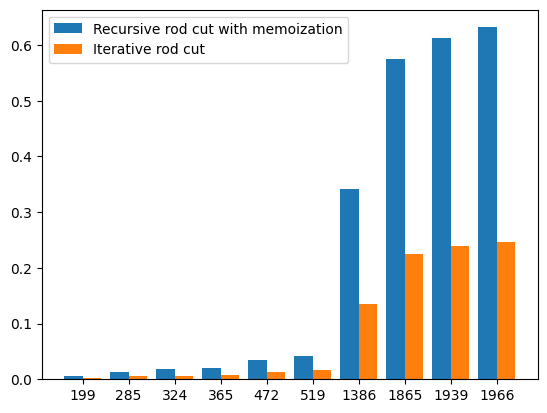

In [147]:
x_axis = np.arange(len(entrada_n))

# Multi bar Chart

plt.bar(x_axis -0.2, media_time_recursive_rod_cut , width=0.4, label = 'Recursive rod cut with memoization')
plt.bar(x_axis +0.2, media_time_iterative_rod_cut, width=0.4, label = 'Iterative rod cut')

# Xticks

plt.xticks(x_axis, entrada_n)

# Add legend

plt.legend()

# Display

plt.show()

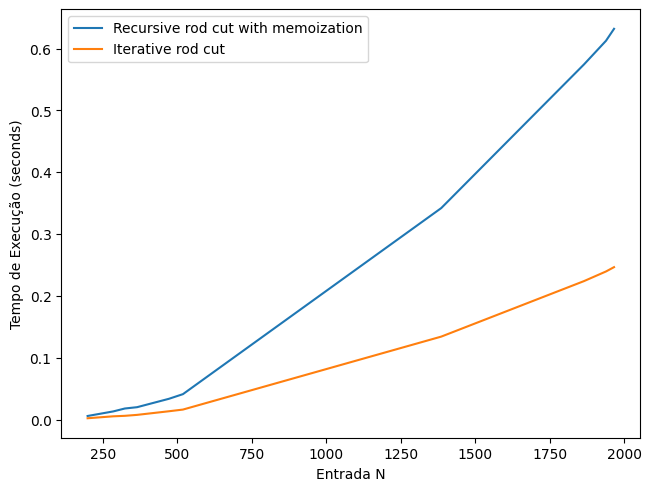

In [148]:
fig, plt = plt.subplots(constrained_layout=True)

plt.plot(entrada_n, media_time_recursive_rod_cut, label='Recursive rod cut with memoization')
plt.plot(entrada_n, media_time_iterative_rod_cut, label='Iterative rod cut')
plt.set_xlabel('Entrada N')
plt.set_ylabel('Tempo de Execução (seconds)')
plt.legend()
